In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
root 

'./fair_taucc'

In [3]:
dataset = "amazon"
sensitive = "gender"
alpha = 1.0

In [4]:
df = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_fair/init_random/aggregated.csv")
df = df[df["fair_minor"] == alpha]
df

,fair_major,fair_minor,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,ARI_rows_mean,...,NMI_rows_var,AMI_rows_var,ARI_rows_var,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var
10,0.0,1.0,0.051251,0.052363,0.033544,0.033298,0.039441,0.110241,0.104424,0.147462,...,0.004584,0.004702,0.011529,0.003171,0.003177,0.005312,0.006114,0.007629,2.038353e-02,39.724663
21,0.1,1.0,0.057622,0.060049,0.048425,0.048212,0.057603,0.140382,0.135385,0.196358,...,0.003756,0.003747,0.011335,0.003596,0.003598,0.005758,0.010661,0.014299,2.043960e-02,1156.868804
32,0.2,1.0,0.053660,0.056184,0.041557,0.041314,0.047835,0.146044,0.140422,0.209446,...,0.005111,0.005165,0.013536,0.005334,0.005340,0.008899,0.007592,0.012472,2.731433e-02,2091.885645
43,0.3,1.0,0.056647,0.061112,0.046983,0.046758,0.056640,0.168753,0.163483,0.245282,...,0.004294,0.004382,0.010998,0.003381,0.003387,0.007328,0.003114,0.005771,1.360653e-02,1838.763288
54,0.4,1.0,0.048987,0.050734,0.032341,0.032082,0.036256,0.105950,0.099791,0.147669,...,0.004624,0.004710,0.012456,0.002422,0.002427,0.003945,0.009381,0.009004,1.588807e-02,94.367569
65,0.5,1.0,0.051444,0.054750,0.041602,0.041320,0.047031,0.119290,0.112602,0.166241,...,0.001511,0.001567,0.004143,0.002669,0.002676,0.005248,0.004851,0.009210,8.584560e-03,1809.575751
76,0.6,1.0,0.050355,0.056597,0.045400,0.045111,0.053131,0.114305,0.107299,0.158933,...,0.001773,0.001851,0.005347,0.003018,0.003022,0.006000,0.002595,0.007016,7.466729e-03,2076.944196
87,0.7,1.0,0.046230,0.048886,0.034893,0.034546,0.035914,0.077307,0.069004,0.094586,...,0.000920,0.000975,0.002712,0.004757,0.004772,0.009524,0.004141,0.009162,1.733065e-03,38.774424
98,0.8,1.0,0.039590,0.044285,0.031398,0.031022,0.029087,0.065460,0.056212,0.065496,...,0.000425,0.000452,0.000709,0.000835,0.000839,0.001088,0.002626,0.005347,8.525039e-04,1627.373600
109,0.9,1.0,0.032257,0.036850,0.016538,0.016100,0.012087,0.036051,0.024886,0.020465,...,0.000199,0.000185,0.000137,0.000376,0.000376,0.000481,0.005735,0.008864,3.912457e-04,1905.911883


In [5]:
df_vanilla = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_vanilla/init_random/results_aggregated.csv")
df_vanilla

,tau_x_mean,tau_x_std,tau_x_var,tau_y_mean,tau_y_std,tau_y_var,NMI_mean,NMI_std,NMI_var,AMI_mean,...,balance_chierichetti_var,balance_bera_mean,balance_bera_std,balance_bera_var,KL_fairness_error_mean,KL_fairness_error_std,KL_fairness_error_var,time_mean,time_std,time_var
0,0.075193,0.010562,0.000112,0.079584,0.009769,0.000095,0.083629,0.014294,0.000204,0.08337,...,0.001807,0.365045,0.074519,0.005553,inf,NaN,NaN,1.193182,0.84301,0.710667


In [6]:
values = np.unique(df["fair_minor"])
values

array([1.])

In [7]:
def create_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [8]:
plot_path = root + f"/plots/paper"
#create_path(plot_path)
plot_path

'./fair_taucc/plots/paper'

## Plot of Results (only balance, ARI e taus)

In [9]:
x = np.array(df["fair_major"].values)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Balance

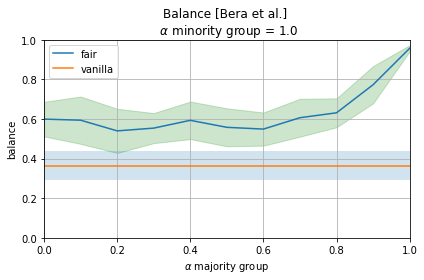

In [10]:
# Vanilla TauCC
vanilla_bera_mean = np.full(len(x), df_vanilla["balance_bera_mean"].values[0])
vanilla_bera_std = np.full(len(x), df_vanilla["balance_bera_std"].values[0])

# Fair TauCC
balance_bera_mean = np.array(df["balance_bera_mean"].values)
balance_bera_std = np.array(df["balance_bera_std"].values)

plt.plot(x, balance_bera_mean, label='fair')
plt.fill_between(x, balance_bera_mean - balance_bera_std, balance_bera_mean + balance_bera_std, alpha=0.2, color='g')
plt.plot(x, vanilla_bera_mean, label='vanilla')
plt.fill_between(x, vanilla_bera_mean - vanilla_bera_std, vanilla_bera_mean + vanilla_bera_std, alpha=0.2)
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ majority group')
plt.ylabel('balance')
plt.title(f'Balance [Bera et al.] \n $\\alpha$ minority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_fairness_min.png", dpi=300)

ARI w.r.t. true labels

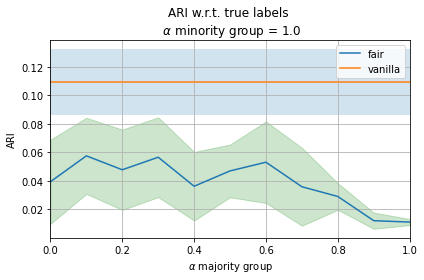

In [11]:
vanilla_ARI_mean = np.full(len(x), df_vanilla["ARI_mean"].values[0])
vanilla_ARI_std = np.full(len(x), df_vanilla["ARI_std"].values[0])

ARI_mean = np.array(df["ARI_true_labels_mean"].values)
ARI_std = np.array(df["ARI_true_labels_std"].values)

plt.plot(x, ARI_mean, label='fair')
plt.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
plt.plot(x, vanilla_ARI_mean, label='vanilla')
plt.fill_between(x, vanilla_ARI_mean - vanilla_ARI_std, vanilla_ARI_mean + vanilla_ARI_std, alpha=0.2)
#plt.ylim(0.0, 0.15)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ majority group')
plt.ylabel('ARI')
plt.title(f'ARI w.r.t. true labels \n $\\alpha$ minority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_ARI_true_min.png", dpi=300)

ARI w.r.t. vanilla TauCC

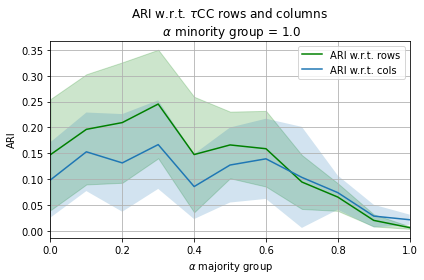

In [12]:
ARIrows_mean = np.array(df["ARI_rows_mean"].values)
ARIrows_std = np.array(df["ARI_rows_std"].values)
ARI_mean = np.array(df["ARI_cols_mean"].values)
ARI_std = np.array(df["ARI_cols_std"].values)

plt.plot(x, ARIrows_mean, label='ARI w.r.t. rows', color="green")
plt.fill_between(x, ARIrows_mean - ARIrows_std, ARIrows_mean + ARIrows_std, alpha=0.2, color="green")
plt.plot(x, ARI_mean, label='ARI w.r.t. cols')
plt.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2)
#plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ majority group')
plt.ylabel('ARI')
plt.title(f'ARI w.r.t. $\\tau$CC rows and columns \n $\\alpha$ minority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_ARI_min.png", dpi=300)

tau x and tau y

In [13]:
vanilla_taux_mean = np.full(len(x), df_vanilla["tau_x_mean"].values[0])
vanilla_taux_std = np.full(len(x), df_vanilla["tau_x_std"].values[0])
vanilla_tauy_mean = np.full(len(x), df_vanilla["tau_y_mean"].values[0])
vanilla_tauy_std = np.full(len(x), df_vanilla["tau_y_std"].values[0])

taux_mean = np.array(df["tau_x_mean"].values)
taux_std = np.array(df["tau_x_std"].values)
tauy_mean = np.array(df["tau_y_mean"].values)
tauy_std = np.array(df["tau_y_std"].values)

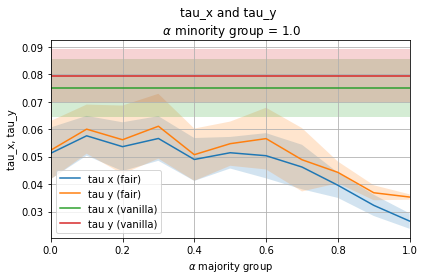

In [14]:
# fair
plt.plot(x, taux_mean, label='tau x (fair)')
plt.fill_between(x, taux_mean - taux_std, taux_mean + taux_std, alpha=0.2)
plt.plot(x, tauy_mean, label='tau y (fair)')
plt.fill_between(x, tauy_mean - tauy_std, tauy_mean + tauy_std, alpha=0.2)

# vanilla
plt.plot(x, vanilla_taux_mean, label='tau x (vanilla)')
plt.fill_between(x, vanilla_taux_mean - vanilla_taux_std, vanilla_taux_mean + vanilla_taux_std, alpha=0.2)
plt.plot(x, vanilla_tauy_mean, label='tau y (vanilla)')
plt.fill_between(x, vanilla_tauy_mean - vanilla_tauy_std, vanilla_tauy_mean + vanilla_tauy_std, alpha=0.2) 

plt.legend()
plt.xlabel('$\\alpha$ majority group')
plt.ylabel('tau_x, tau_y')
plt.title(f'tau_x and tau_y \n $\\alpha$ minority group = {alpha}')

plt.xlim(0.0, 1.0)

plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_tau_min.png", dpi=300)